In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [10]:
pas_clean_path = r"C:\Users\Usuario\Desktop\TUE\Data Challenge 2\Data-Challenge-2-JBG050\Data\PAS_stop_and_search.csv"
shape_path = r"C:\Users\Usuario\Desktop\TUE\Data Challenge 2\Data-Challenge-2-JBG050\Data\LSOA_2011_London_gen_MHW.shp"
xlsx_path = r"C:\Users\Usuario\Desktop\TUE\Data Challenge 2\Data-Challenge-2-JBG050\Data\PAS_Dashboard_Borough.csv"
df_pas_clean = pd.read_csv(pas_clean_path)
shape = gpd.read_file(shape_path)
df_trust_confidence = pd.read_csv(xlsx_path)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21600\1653729919.py:4: DtypeWarning: Columns (7,8,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pas_clean = pd.read_csv(pas_clean_path)


London Boroughs List

In [7]:
london_boroughs = [
    "Barking and Dagenham", "Barnet", "Bexley", "Brent", "Bromley",
    "Camden", "Croydon", "Ealing", "Enfield", "Greenwich", "Hackney",
    "Hammersmith and Fulham", "Haringey", "Harrow", "Havering",
    "Hillingdon", "Hounslow", "Islington", "Kensington and Chelsea",
    "Kingston upon Thames", "Lambeth", "Lewisham", "Merton", "Newham",
    "Redbridge", "Richmond upon Thames", "Southwark", "Sutton",
    "Tower Hamlets", "Waltham Forest", "Wandsworth", "Westminster"
]


# Finding age group with lowest average well informed score based on PAS answers as well as mapping per boroygh

In [41]:
#Making age consistent
df_pas_clean['Age'] = df_pas_clean['Age'].replace({
    '65 or over': '65+',
    '35-44': '35-44',
    '25-34': '25-34',
    '45-54': '45-54',
    '55-64': '55-64',
    '16-24': '16-24',
    '35 to 44': '35-44',
    '25 to 34': '25-34',
    '65+': '65+',
    '55 to 64': '55-64',
    '45 to 54': '45-54',
    '16 to 24': '16-24'
})

In [42]:
df_selected = df_pas_clean[df_pas_clean["FinancialYear"].isin(["2016/17","2017/18","2019/20","2018/19","2020/21"])]
df_selected = df_selected[['Age','Well informed']].copy()

# Map the Q131 Values
well_informed_mapping = {'Not at all informed': 1, 'Fairly well informed': 2, 'Very well informed': 3}

df_selected['Well informed'] = df_selected['Well informed'].map(well_informed_mapping)

# Group by Borough and calculate the mean of Q131
df_well_informed = df_selected.groupby(["Age"]).mean().reset_index()

# Display the resulting DataFrame
df_well_informed


,Age,Well informed
0,16-24,1.438533
1,25-34,1.442833
2,35-44,1.505900
3,45-54,1.550957
4,55-64,1.528082
5,65+,1.550835
6,Refused,NaN


In [43]:
df_opinion_change_grouped_age_borough

,Borough,Age,Well informed
0,Barking & Dagenham,16-24,NaN
1,Barking & Dagenham,25-34,NaN
2,Barking & Dagenham,35-44,NaN
3,Barking & Dagenham,45-54,NaN
4,Barking & Dagenham,55-64,NaN
...,...,...,...
212,Westminster,25-34,1.415730
213,Westminster,35-44,1.520408
214,Westminster,45-54,1.611940
215,Westminster,55-64,1.326087


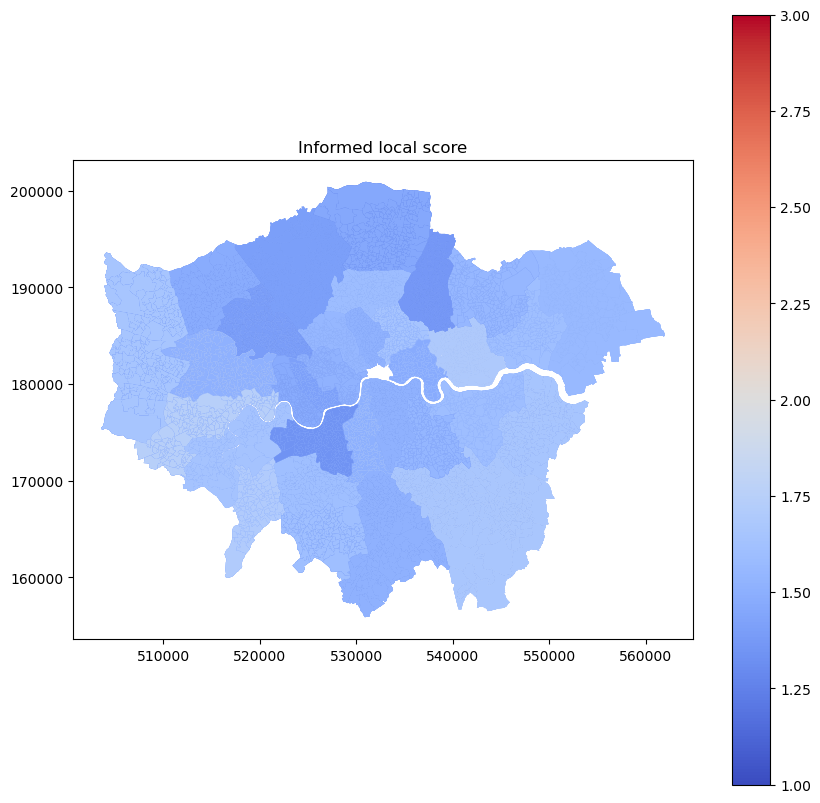

In [44]:
# Merging geo dataframe with information scores
merged_gdf = shape.merge(df_opinion_change_grouped_age_borough, left_on='LAD11NM', right_on='Borough')

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf.plot(column='Well informed', cmap='coolwarm', linewidth=0, ax=ax, edgecolor='black', legend=True, vmin=1, vmax=3)

plt.title('Informed local score')

# Saving the plot as a PNG file
plt.savefig('average_informedscore_per_borough.png')

plt.show()


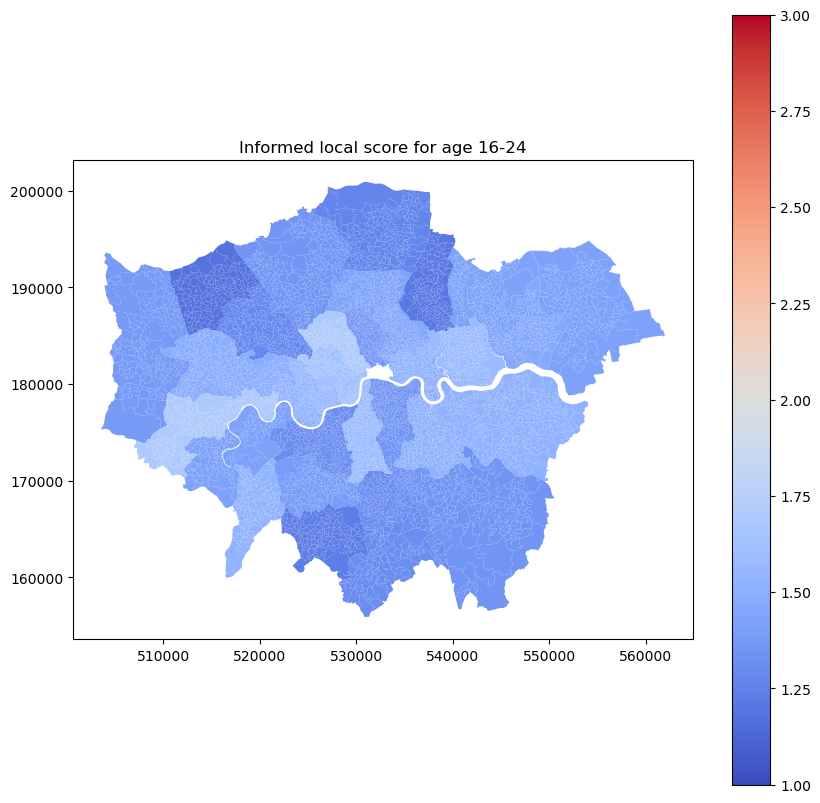

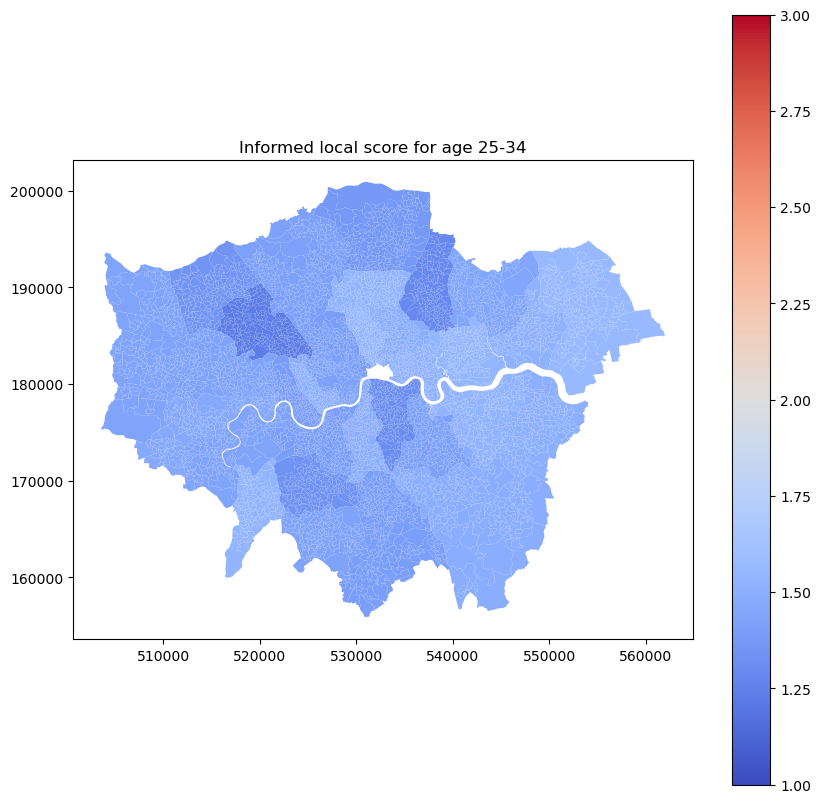

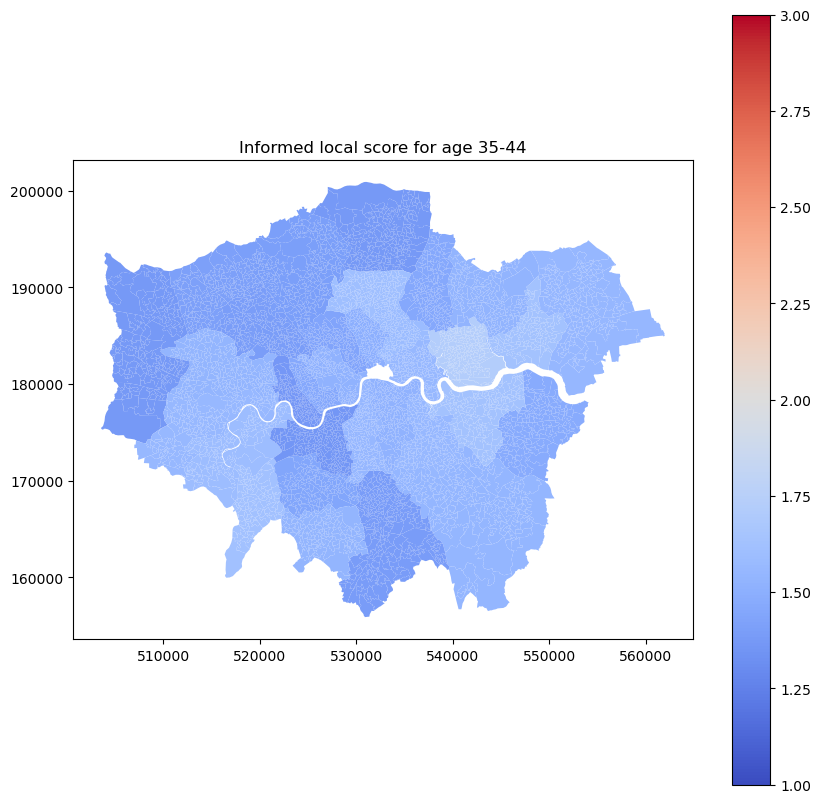

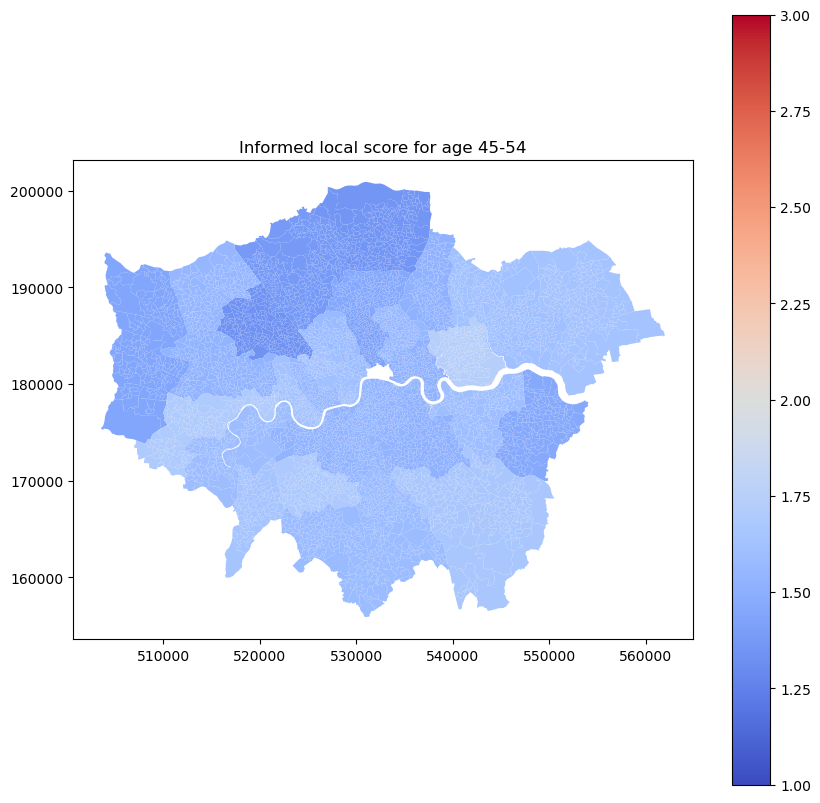

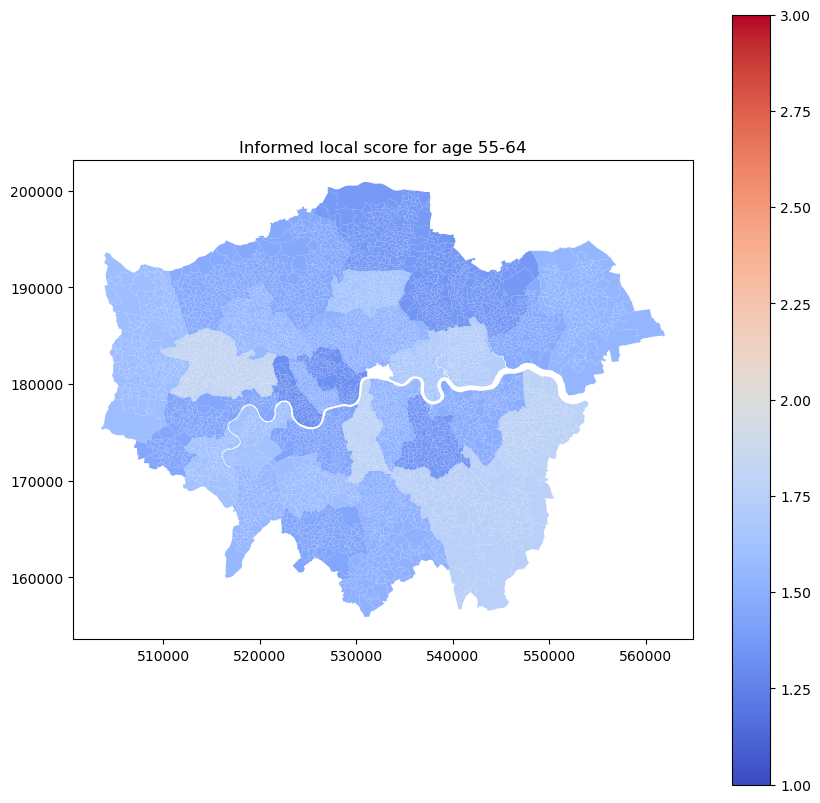

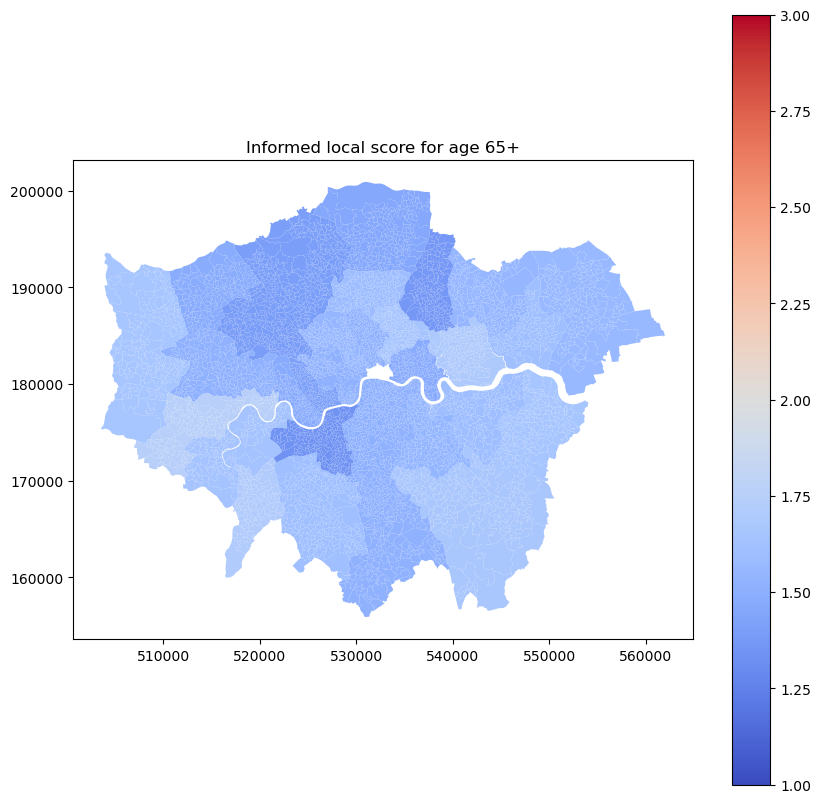

In [45]:
ages = ["16-24", "25-34", "35-44", "45-54", "55-64", "65+"]
i=16
for age in ages:
    df_opinion_change_grouped_age_borough_i = df_opinion_change_grouped_age_borough[df_opinion_change_grouped_age_borough["Age"] == age]
    
    merged_gdf = shape.merge(df_opinion_change_grouped_age_borough_i, left_on='LAD11NM', right_on='Borough')
    
    # Creating the plot
    fig, ax = plt.subplots(figsize=(10, 10))
    merged_gdf.plot(column='Well informed', cmap='coolwarm', linewidth=0, ax=ax, edgecolor='black', legend=True, vmin=1, vmax=3)

    plt.title(f'Informed local score for age {age}')
    
    # Saving the plot as a PNG file
    plt.savefig(f'average_informedscore_{i}_per_borough.png')
    i+=9
    plt.show()
